In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

import fiona
import geopandas as gpd
from pathlib import Path

In [2]:
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [3]:
nuts_regions = gpd.read_file("https://gisco-services.ec.europa.eu/distribution/v2/nuts/shp/NUTS_RG_60M_2021_3035.shp.zip")
nuts_regions.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,DE149,3,DE,Sigmaringen,Sigmaringen,4.0,3,3,DE149,"POLYGON ((4272515.778 2791989.118, 4291502.208..."
1,DE211,3,DE,"Ingolstadt, Kreisfreie Stadt","Ingolstadt, Kreisfreie Stadt",4.0,2,3,DE211,"POLYGON ((4430560.572 2849070.969, 4426522.606..."
2,DE212,3,DE,"München, Kreisfreie Stadt","München, Kreisfreie Stadt",4.0,1,3,DE212,"POLYGON ((4426190.454 2780289.957, 4425325.775..."
3,DE213,3,DE,"Rosenheim, Kreisfreie Stadt","Rosenheim, Kreisfreie Stadt",4.0,2,3,DE213,"POLYGON ((4470814.937 2743662.905, 4477767.129..."
4,DE214,3,DE,Altötting,Altötting,4.0,2,3,DE214,"POLYGON ((4539906.565 2792493.475, 4525936.167..."


In [4]:
nuts_regions.to_file("./02/data/europe_nuts_regions.geojson")

### WFS

In [5]:
population_grid = gpd.read_file(
    "https://kartta.hsy.fi/geoserver/wfs"
    "?service=wfs"
    "&version=2.0.0"
    "&request=GetFeature"
    "&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2020"
    "&srsName=EPSG:3879"
    "&bbox=25494767,6671328,25497720,6673701,EPSG:3879",
    crs="EPSG:3879"
)
population_grid.head()


,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,Vaestotietoruudukko_2020.3179,15177,389,36,37,38,63,77,54,58,37,17,8,"POLYGON ((25494750.000 6671998.997, 25494750.0..."
1,Vaestotietoruudukko_2020.3180,15178,296,38,31,20,69,73,32,40,15,14,2,"POLYGON ((25494750.000 6671748.997, 25494750.0..."
2,Vaestotietoruudukko_2020.3181,15179,636,40,91,56,46,142,111,88,55,39,8,"POLYGON ((25494750.000 6671498.998, 25494750.0..."
3,Vaestotietoruudukko_2020.3182,15180,1476,30,120,84,647,297,141,105,57,24,1,"POLYGON ((25494750.000 6671248.999, 25494750.0..."
4,Vaestotietoruudukko_2020.3208,15337,23,37,99,99,99,99,99,99,99,99,99,"POLYGON ((25494999.998 6672499.005, 25494999.9..."


In [6]:
input_filename = list(Path("./02/data/L4/").glob("**/m*p.shp"))[0]
input_filename

PosixPath('02/data/L4/L41/L4132R.shp/m_L4132R_p.shp')

In [7]:
data = gpd.read_file(input_filename, include_fields=["RYHMA", "LUOKKA", "geometry"])
data.head()

,RYHMA,LUOKKA,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((379001.249 6689382.610, 378996.464 6..."
3,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [8]:
data = data.rename(
    columns={
        "RYHMA": "GROUP",
        "LUOKKA": "CLASS"
    }
)

In [9]:
data.head()

,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((379001.249 6689382.610, 378996.464 6..."
3,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


<AxesSubplot:>

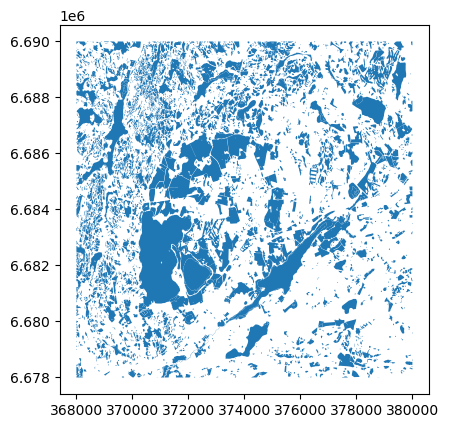

In [10]:
data.plot()

In [15]:
data.area.sum()

47817474.62310167

<AxesSubplot:>

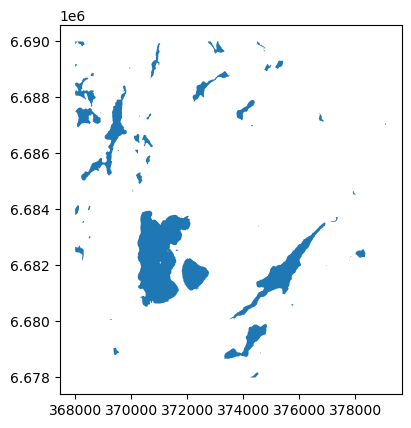

In [16]:
lakes = data[data.CLASS == 36200]
lakes.plot()

In [20]:
lakes.area.sum() / 1e6

9.989886493045978

In [22]:
lakes.to_file("./02/data/lakes.shp")

In [8]:
countries = gpd.read_file("./data/ref-countries-2020-01m.gdb.zip")

In [9]:
countries.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

<AxesSubplot:>

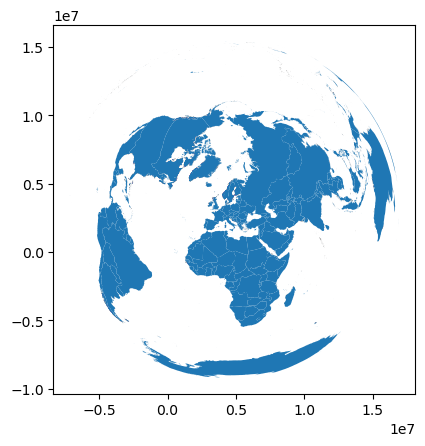

In [14]:
countries.plot()

<AxesSubplot:>

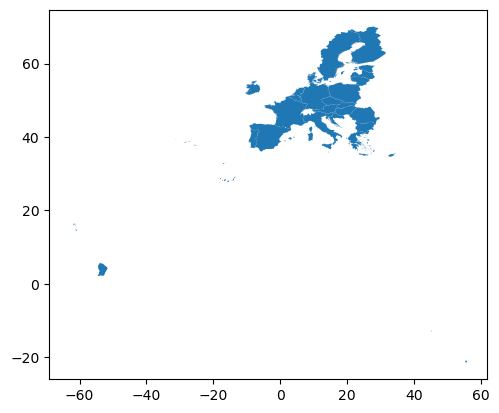

In [20]:
eu_countries = countries[countries["EU_STAT"] == "T"]
eu_countries = eu_countries.to_crs("EPSG:4326")
eu_countries.plot()

<AxesSubplot:>

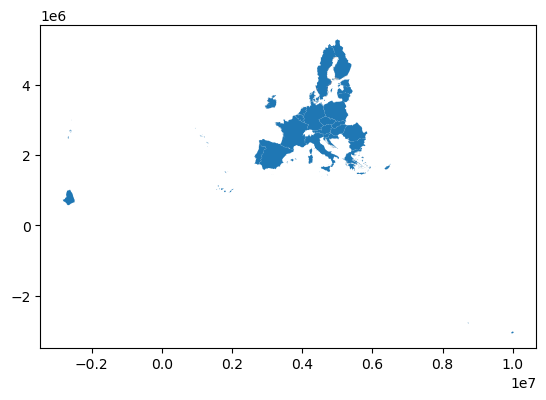

In [21]:
eu_countries_EPSG3035 = eu_countries.to_crs("EPSG:3035")
eu_countries_EPSG3035.plot()

In [22]:
eu_countries_EPSG3035.to_file("data/eu_countries_EPSG3035.gpkg")

In [23]:
import pyproj

In [26]:
crs = pyproj.CRS(eu_countries.crs)
print("to_proj4", crs.to_proj4(), "\n")
print("to_wkt", crs.to_wkt(), "\n")
print("to_epsg", crs.to_epsg(), "\n")

to_proj4 +proj=longlat +datum=WGS84 +no_defs +type=crs 

to_wkt GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]] 

to_epsg 4326 



In [27]:
crs = pyproj.CRS("EPSG:4326")
crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
world_countries = gpd.read_file("data/ne_110m_admin_0_countries.zip")

<AxesSubplot:>

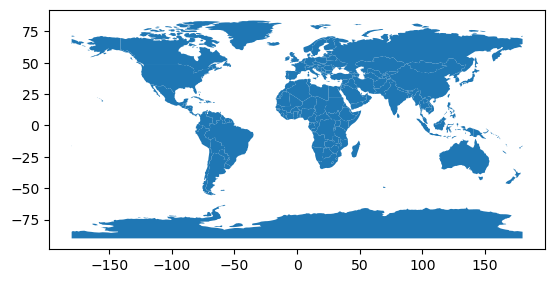

In [30]:
world_countries.plot()

In [33]:
world_countries_EPSG3857 = world_countries.to_crs("EPSG:3857")

<AxesSubplot:>

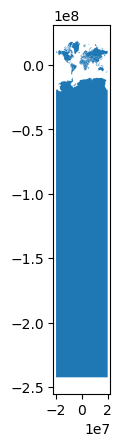

In [34]:
world_countries_EPSG3857.plot()

<AxesSubplot:>

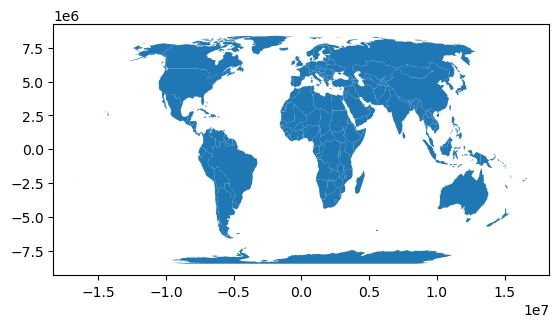

In [36]:
ECKERT_IV = "+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
world_countries_eckert_iv = world_countries.to_crs(ECKERT_IV)
world_countries_eckert_iv.plot()

<AxesSubplot:>

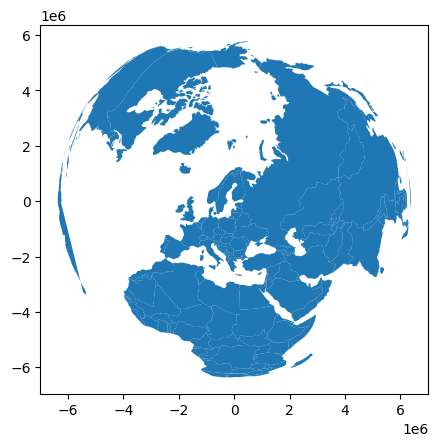

In [38]:
world_countries_ortho = world_countries.to_crs(
    "+proj=ortho +lat_0=60.00 +lon_0=23.0000 +x_0=0 +y_0=0 "
    "+a=6370997 +b=6370997 +units=m +no_defs"
)
world_countries_ortho.plot()